In [ ]:
#for giving an array 
import numpy as np
#for Data Analysis
import pandas as pd
#For drawing 2D Graphs
import matplotlib.pyplot as plt
%matplotlib inline
#For drawing 3D graph
import seaborn as sns
import scipy.stats as stats
#Splitting the data into train and test using the sklearn.model_selection libray
from sklearn.model_selection import train_test_split
#For Avoding the warning
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
#Fitting nural network to the training set  and testing set
from sklearn.neural_network import MLPClassifier
#Calculating the cross val score using sklearn libray
from sklearn.model_selection import cross_val_score
#Getting the accuracy and claassification report
from sklearn.metrics import  accuracy_score, classification_report,confusion_matrix
from sklearn import metrics
#Using k fold cross validation
from sklearn.model_selection import StratifiedKFold
#Roc-Auc Score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score,roc_curve,roc_auc_score

Data Pre-Processing

Reading the CSV File

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Change the directory to data-mining-Colab folder
%cd /content/drive/My Drive/Colab Notebooks/ML/assignment 5

/content/drive/My Drive/Colab Notebooks/ML/assignment 5


In [ ]:
#Reading the file
cancer_data =  pd.read_csv('cancer.csv')
#getting top 5 rows from dataframe
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#How many rows and columns
cancer_data.shape

(569, 33)

In [ ]:
#Check the null values
cancer_data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
cancer_data.drop(columns='Unnamed: 32',inplace=True)

In [ ]:
cancer_data.drop(columns='id',inplace=True)

In [ ]:
#Check the null values
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
#Encode the diagnosis values
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
cancer_data['diagnosis'] = labelencoder.fit_transform(cancer_data['diagnosis'])

In [ ]:
cancer_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#Statistical Information
cancer_data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
cancer_data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
cancer_data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

Data Visualization


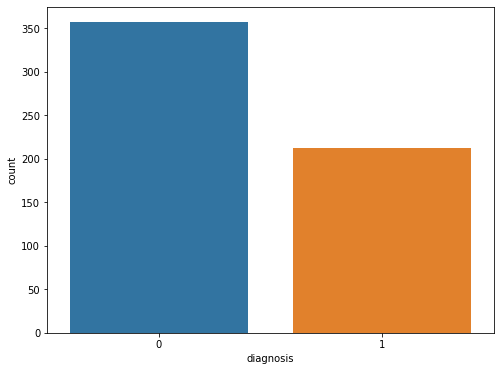

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='diagnosis', data=cancer_data)

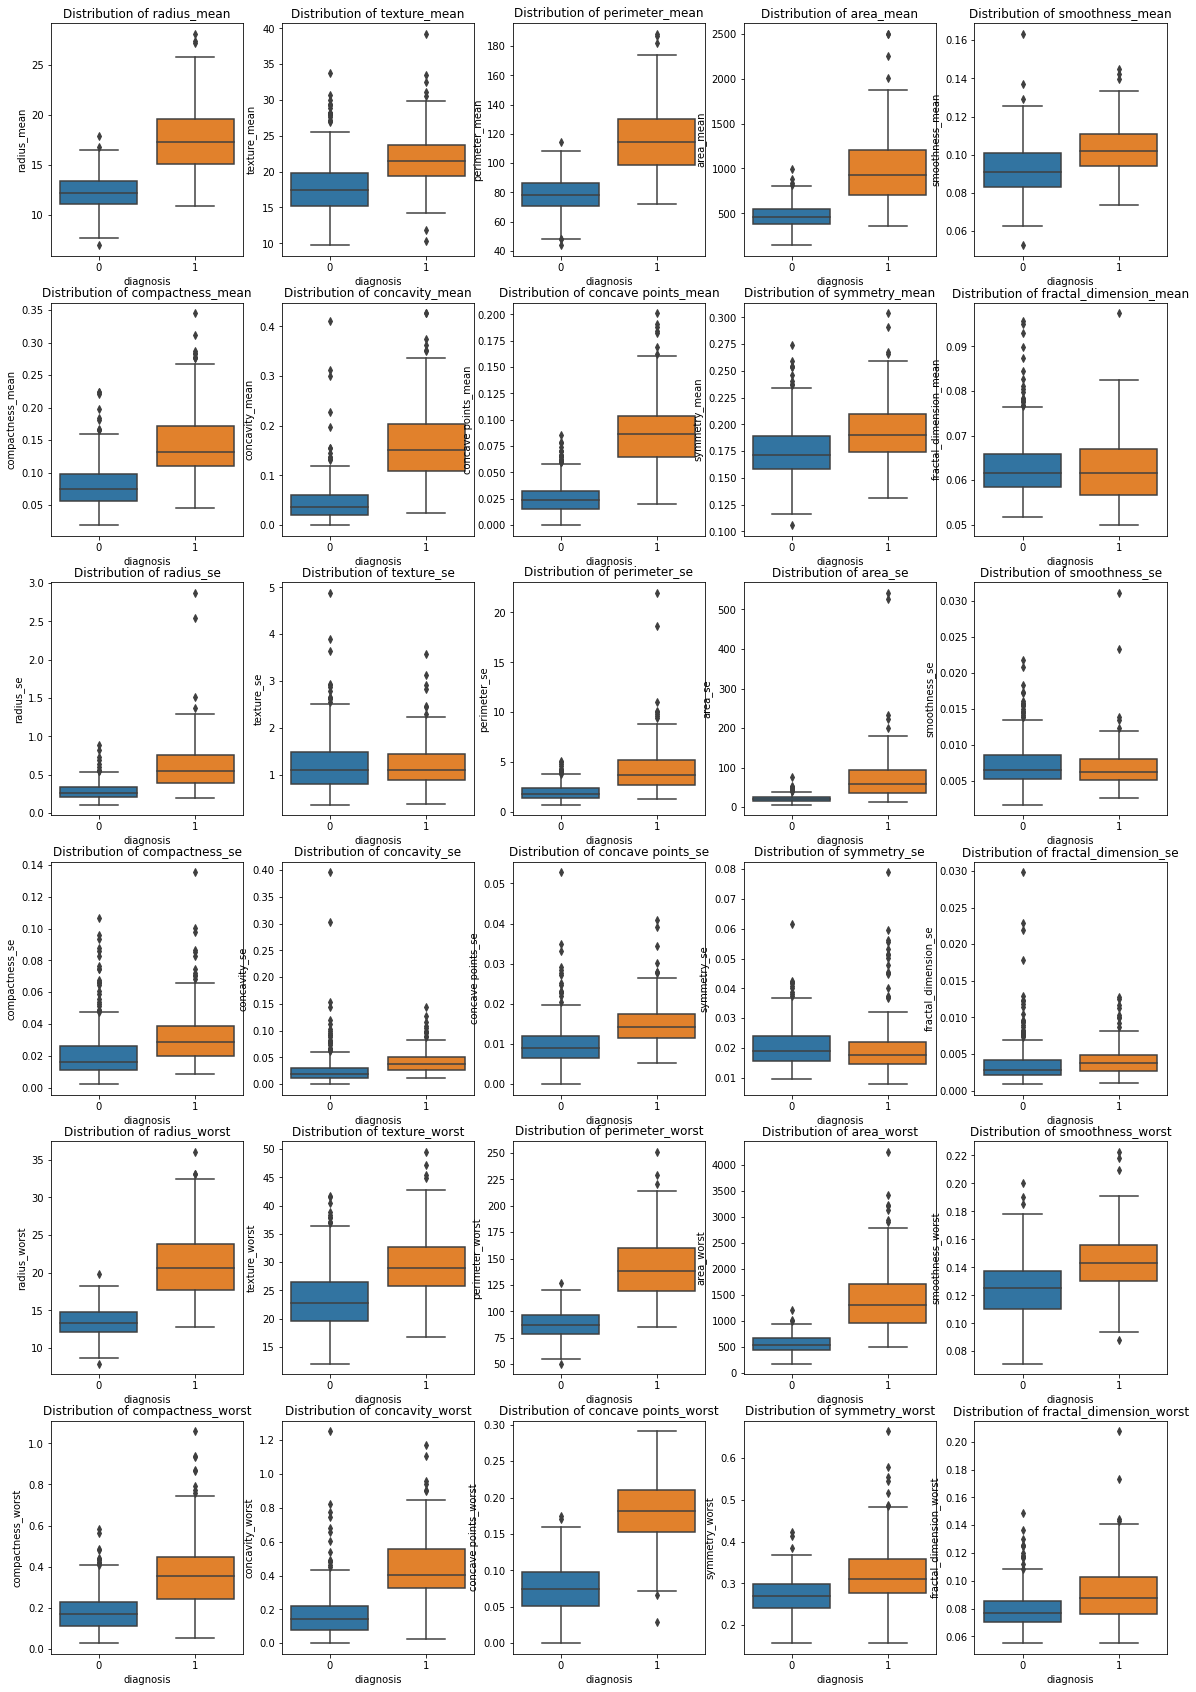

In [ ]:
#Finding the outlier for each column
cols = [ 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
plt.subplots(6,5,figsize=[20,30])
i=1
for cols in cols:
    plt.subplot(6,5,i)
    sns.boxplot(y=cancer_data[cols],x=cancer_data['diagnosis'])
    plt.title("Distribution of "+cols)
    i=i+1

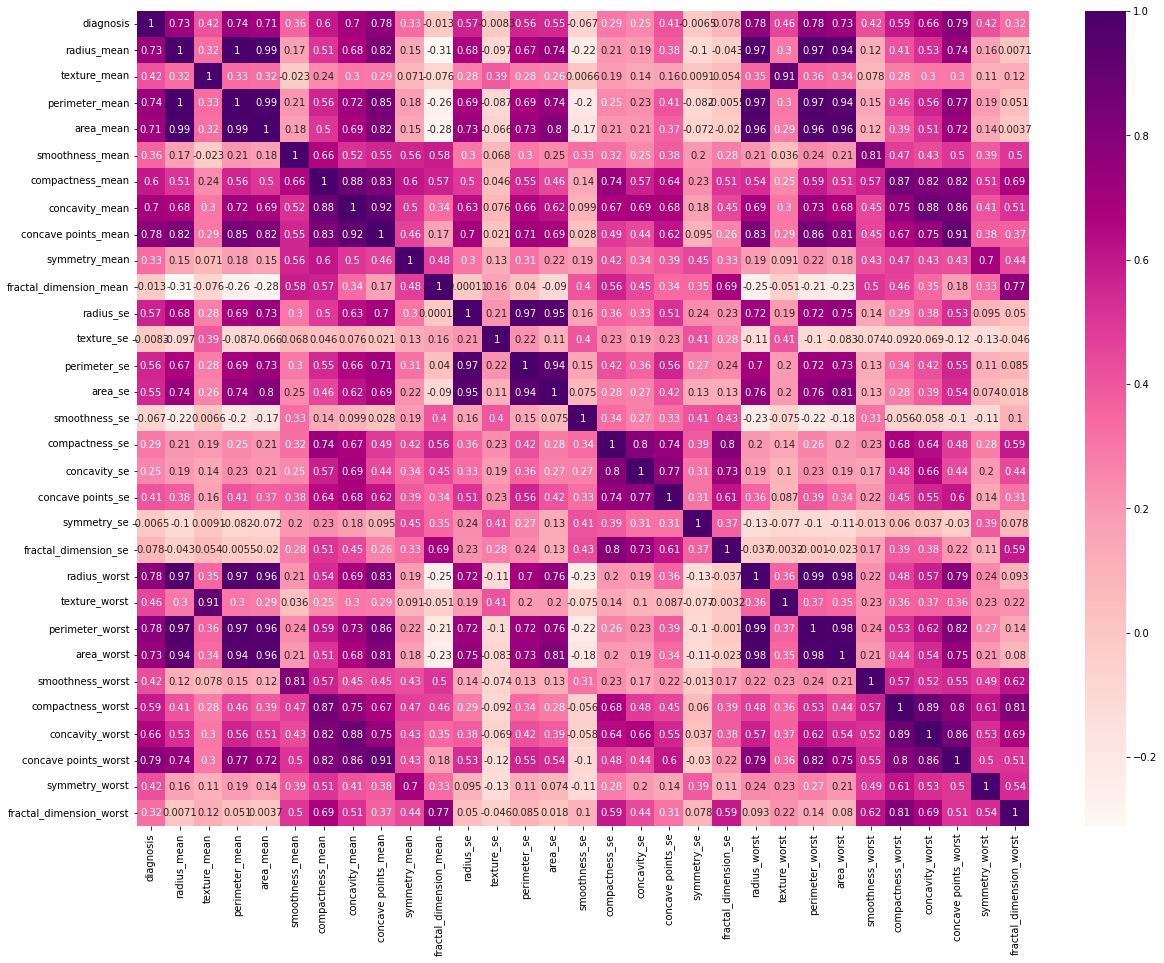

In [ ]:
#Correlation between the features using the heatmap
fig, ax = plt.subplots(figsize=(20,15))
fig.patch.set_facecolor('white')
sns.heatmap(cancer_data.corr(), ax=ax, annot=True, cmap="RdPu")

Spliting the data into train and test

In [ ]:
#Creating the variable  x and y
x = cancer_data.drop("diagnosis", axis=1)
y = cancer_data["diagnosis"]

In [ ]:
#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
#printing the shape of x_train,x_test,y_train,y_test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(455, 30)
(455,)
(114, 30)
(114,)


Appling the Alogrithm

neural network

In [ ]:
#Split dataset into k consecutive folds (without shuffling by default)
#Creating the variable num_folds for how many no. of folds
num_folds = 5
#t maintains the same class ratio throughout the K folds as the ratio in the original dataset.
kfold=StratifiedKFold(n_splits = num_folds)

In [ ]:
#Initializing the SVMClassifier
SVMClassifier = SVC()

In [ ]:
for train_index, test_index in kfold.split(x,y):
  clf.fit(X_train, y_train)
  #Making the prediction on X_test
  y_pred = clf.predict(X_test)
  #Making the prediction on X_train
  y_pred1 = clf.predict(X_train)

In [ ]:
#comparing actual response values (y_train with predicted response values (y_pred1)
MLP_Train =  metrics.accuracy_score(y_train, y_pred1)*100
print("MLP model accuracy(in %) for Training:",MLP_Train)
#comparing actual response values (y_test) with predicted response values (y_pred)
MLP_Test = metrics.accuracy_score(y_test, y_pred)*100
print("MLP model accuracy(in %) for Testing:", MLP_Test)

MLP model accuracy(in %) for Training: 92.3076923076923
MLP model accuracy(in %) for Testing: 93.85964912280701


In [ ]:
#Initializing the MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(50, 100,150))

In [ ]:
for train_index, test_index in kfold.split(x,y):
  clf.fit(X_train, y_train)
  #Making the prediction on X_test
  y_pred = clf.predict(X_test)
  #Making the prediction on X_train
  y_pred1 = clf.predict(X_train)

In [ ]:
#comparing actual response values (y_train with predicted response values (y_pred1)
MLP_Train =  metrics.accuracy_score(y_train, y_pred1)*100
print("MLP model accuracy(in %) for Training:",MLP_Train)
#comparing actual response values (y_test) with predicted response values (y_pred)
MLP_Test = metrics.accuracy_score(y_test, y_pred)*100
print("MLP model accuracy(in %) for Testing:", MLP_Test)

MLP model accuracy(in %) for Training: 92.74725274725274
MLP model accuracy(in %) for Testing: 94.73684210526315


In [ ]:
##Confusion Matrix is the number of correct and incorrect predictions made by a classifier
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Linear Discriminat Analysis :")
print(result)
#Getting the classification report
result1 = classification_report(y_test, y_pred)
print("Classification Report for Linear Discriminat Analysis :",)
print (result1)
#Overall accuracy
result2 = accuracy_score(y_test,y_pred)*100
print("Overall Accuracy For Linear Discriminat Analysis :",result2)

Confusion Matrix for Linear Discriminat Analysis :
[[65  2]
 [ 4 43]]
Classification Report for Linear Discriminat Analysis :
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        67
           1       0.96      0.91      0.93        47

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114

Overall Accuracy For Linear Discriminat Analysis : 94.73684210526315


In [ ]:
FP = result.sum(axis=0) - np.diag(result) 
FN = result.sum(axis=1) - np.diag(result)
TP = np.diag(result)
TN = result.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
total=sum(sum(result))
# Sensitivity, hit rate, recall, or true positive rate
TPR = ((TP/(TP+FN))).mean()*100
# Specificity or true negative rate
TNR = ((TN/(TN+FP))).mean()*100 

print('Sensitivity:' ,TPR)
print('Specificity: ' ,TNR)

Sensitivity: 94.252143537631
Specificity:  94.252143537631


In [ ]:
probs = clf.predict_proba(X_test)
preds = probs[:,1]

In [ ]:
print('Roc Score', roc_auc_score(y_test, preds, average='weighted'))

Roc Score 0.9641155922515084


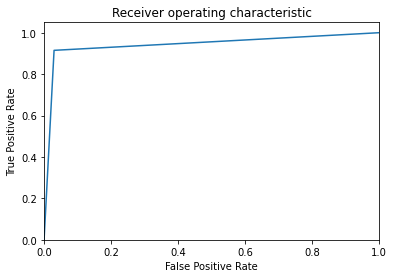

Roc 0.9425214353763098


In [ ]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])


#print roc_auc_score(y_test, y_pred)
plt.figure()
plt.plot(fpr[1], tpr[1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()
print('Roc',roc_auc_score(y_test, y_pred))

auc = 0.9425214353763098


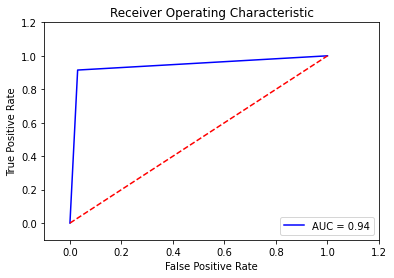

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)
print('auc =', auc)

plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()